In [1]:
%reset -f

#Import Libraries
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import quantities as pq

from scipy import signal
from scipy.signal import hilbert

%matplotlib notebook

In [2]:
X = np.load('data/X.npy')[0,:]
Y = np.load('data/Y.npy')[0,:]
t = np.load('data/t.npy') * pq.s

fs = 1./(t[1]-t[0])

In [3]:
N  = 5    # Filter order
Wn = np.array([175., 225.])/(fs/2.) # Cutoff frequency
B, A = signal.butter(N, Wn, btype='bandpass', output='ba')
X_f = signal.filtfilt(B,A, X)

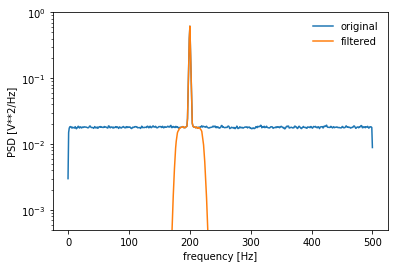

In [4]:
plt.figure()

f, Pxx_den = signal.welch(X, fs, nperseg=1024)
plt.semilogy(f, Pxx_den, label='original')

f, Pxx_den = signal.welch(X_f, fs, nperseg=1024)
plt.semilogy(f, Pxx_den, label='filtered')

plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend(loc='best', framealpha=0)
plt.show()

In [6]:
analytic_signal = hilbert(X_f)

amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)

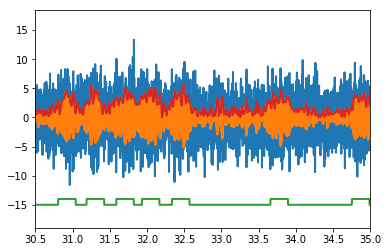

In [7]:
plt.figure()
plt.plot(t, X, lw=2)
plt.plot(t, X_f, lw=2)
plt.plot(t, Y-15, lw=2)
plt.plot(t, amplitude_envelope, lw=2)
plt.xlim(30.5, 35.)
plt.show()

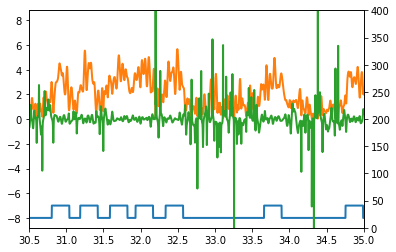

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(t, Y-8, lw=2, c='C0')
ax1.plot(t, amplitude_envelope, lw=2, c='C1')
ax1.set_xlim(30.5, 35.)

ax2 = ax1.twinx()
ax2.plot(t[:-1], instantaneous_frequency, lw=2, c='C2')
ax2.set_ylim(0., 400.)

plt.show()